Enter the current price of the underlying asset (S): 100
Enter the strike price of the option (K): 90
Enter the time to maturity in years (T): 1
Enter the time to choice date in years (Tc): 0.4
Enter the annual risk-free interest rate (r): 0.02
Enter the volatility (sigma): .6


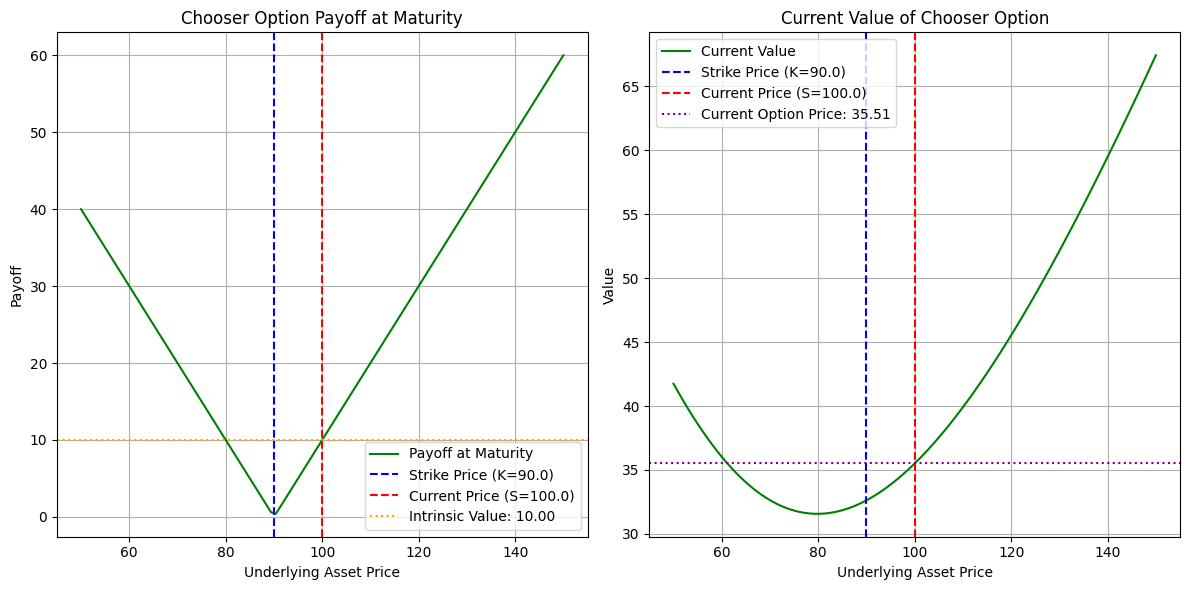

Current chooser option price: 35.51
Intrinsic value: 10.00
Time value: 25.51


In [1]:
#################################
###   CHOOSER OPTION PRICER   ###
#################################

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define Black-Scholes call and put option price formulas
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def black_scholes_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

# Define chooser option value formula
def chooser_option_value(S, K, T, r, sigma, Tc):
    call_value = black_scholes_call(S, K, T-Tc, r, sigma)
    put_value = black_scholes_put(S, K, T-Tc, r, sigma)
    return np.exp(-r * Tc) * (call_value + put_value)

# Collect user inputs
S = float(input("Enter the current price of the underlying asset (S): "))
K = float(input("Enter the strike price of the option (K): "))
T = float(input("Enter the time to maturity in years (T): "))
Tc = float(input("Enter the time to choice date in years (Tc): "))
r = float(input("Enter the annual risk-free interest rate (r): "))
sigma = float(input("Enter the volatility (sigma): "))

# Perform calculations
prices = np.linspace(50, 150, 100)
payoffs = [max(s-K, K-s) for s in prices]  # Optimal exercise payoff
current_values = [chooser_option_value(s, K, T, r, sigma, Tc) for s in prices]
current_price = chooser_option_value(S, K, T, r, sigma, Tc)
intrinsic_value = max(S-K, 0) if S > K else max(K-S, 0)
time_value = current_price - intrinsic_value

# Plot the results
plt.figure(figsize=(12, 6))

# Payoff Graph
plt.subplot(1, 2, 1)
plt.plot(prices, payoffs, 'g-', label="Payoff at Maturity")
plt.axvline(x=K, color='blue', linestyle='--', label=f'Strike Price (K={K})')
plt.axvline(x=S, color='red', linestyle='--', label=f'Current Price (S={S})')
plt.axhline(y=intrinsic_value, color='orange', linestyle=':', label=f'Intrinsic Value: {intrinsic_value:.2f}')
plt.title("Chooser Option Payoff at Maturity")
plt.xlabel("Underlying Asset Price")
plt.ylabel("Payoff")
plt.legend()
plt.grid(True)

# Current Value Graph
plt.subplot(1, 2, 2)
plt.plot(prices, current_values, 'g-', label="Current Value")
plt.axvline(x=K, color='blue', linestyle='--', label=f'Strike Price (K={K})')
plt.axvline(x=S, color='red', linestyle='--', label=f'Current Price (S={S})')
plt.axhline(y=current_price, color='purple', linestyle=':', label=f'Current Option Price: {current_price:.2f}')
plt.title("Current Value of Chooser Option")
plt.xlabel("Underlying Asset Price")
plt.ylabel("Value")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Output the calculated values
print(f"Current chooser option price: {current_price:.2f}")
print(f"Intrinsic value: {intrinsic_value:.2f}")
print(f"Time value: {time_value:.2f}")
0